In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def x(n):
    return np.arange(0,n,1,dtype=int)
def f(x,k):
    return np.exp(-k*x)

In [6]:
n=26
k=.6

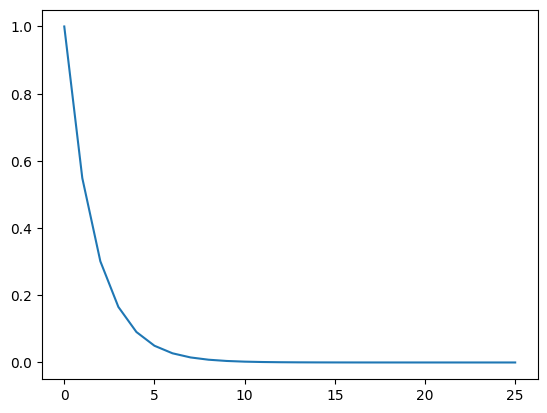

In [7]:
plt.plot(x(n), f(x(n),k))

In [9]:
n_payouts = [2,5,8,10,15,25]
payouts = {}
for p in n_payouts:
    p_sum = -1
    payouts[p] = []
    for i in range (p+1):
        payouts[p].append(f(i,k))
        p_sum += f(i,k)
    payouts[p].pop(0)
    payouts[p] = payouts[p]/p_sum

In [10]:
for n in n_payouts:
    for p in range(len(payouts[n])):
        print(f"#{p+1}", payouts[n][p],)
    print("\n")

#1 0.6456563062257954
#2 0.3543436937742046


#1 0.4748286924815773
#2 0.26059151158520183
#3 0.14301565382529005
#4 0.07848865496291435
#5 0.04307548714501655


#1 0.45493234200509375
#2 0.24967216292790273
#3 0.13702298822359663
#4 0.07519981034948459
#5 0.04127053095186113
#6 0.02264974761416007
#7 0.012430445045243954
#8 0.0068219728826572215


#1 0.4523095271308762
#2 0.24823273160561163
#3 0.13623301156456508
#4 0.07476626196676538
#5 0.04103259455461509
#6 0.022519165350701153
#7 0.012358779979590203
#8 0.006782642260725001
#9 0.003722392996148975
#10 0.002042892590401463


#1 0.4512440518460072
#2 0.24764798637130495
#3 0.13591209657582703
#4 0.07459014008674895
#5 0.04093593681749132
#6 0.02246611845984911
#7 0.012329667228631993
#8 0.006766664844240427
#9 0.0037136244040675208
#10 0.002038080285034999
#11 0.0011185221757210378
#12 0.0006138579852649132
#13 0.0003368924052226196
#14 0.00018489047209787747
#15 0.00010147004249023314


#1 0.4511885019255834
#2 0.2476174999285922